#1.Dataset  
load the AG News dataset, rename columns, and combine the title and description into a single text field for processing.


In [ ]:
import pandas as pd

df = pd.read_csv('train.csv', header=None)
df.columns = ['label', 'title', 'description']
df['text'] = df['title'] + ' ' + df['description']
df = df[['text', 'label']]
df.head()

,text,label
0,Title Description,Class Index
1,Wall St. Bears Claw Back Into the Black (Reute...,3
2,Carlyle Looks Toward Commercial Aerospace (Reu...,3
3,Oil and Economy Cloud Stocks' Outlook (Reuters...,3
4,Iraq Halts Oil Exports from Main Southern Pipe...,3


#2.Clean Data  
removes URLs, special characters,stopwords.clean & normalized text for vectorization.


In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import re

stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = str(text)
    text = re.sub(r'https?://\S+', '', text)
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    text = text.lower()
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

df['clean_text'] = df['text'].apply(clean_text)
df.head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,text,label,clean_text
0,Title Description,Class Index,title description
1,Wall St. Bears Claw Back Into the Black (Reute...,3,wall st bears claw back black reuters reuters ...
2,Carlyle Looks Toward Commercial Aerospace (Reu...,3,carlyle looks toward commercial aerospace reut...
3,Oil and Economy Cloud Stocks' Outlook (Reuters...,3,oil economy cloud stocks outlook reuters reute...
4,Iraq Halts Oil Exports from Main Southern Pipe...,3,iraq halts oil exports main southern pipeline ...


#3.Convert text to numeric features (TF-IDF)  
use TF-IDF vectorization to convert cleaned text to numerical features to model can understand.


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=10000)
X = vectorizer.fit_transform(df['clean_text'])
y = df['label']

#4.Train classification model  
train (Logistic Regression) model to classify the news topics based on the TF-IDF features.

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X, y)

LogisticRegression(max_iter=1000)

#5. Evaluate model  
split the data to training and testing sets, evaluate the model using accuracy score and a confusion matrix.

Model Accuracy: 0.9155035206866381


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Classification Report:
               precision    recall  f1-score   support

           1       0.93      0.90      0.91      6047
           2       0.95      0.98      0.97      5872
           3       0.89      0.88      0.89      6079
           4       0.89      0.90      0.90      6002
 Class Index       0.00      0.00      0.00         1

    accuracy                           0.92     24001
   macro avg       0.73      0.73      0.73     24001
weighted avg       0.92      0.92      0.92     24001



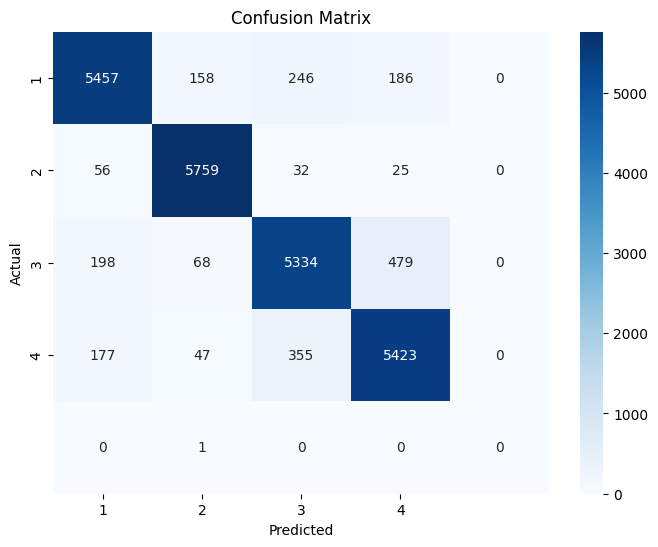

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
label_html = {
    1: '<div style="display:flex;align-items:center;"><img src="https://cdn-icons-png.flaticon.com/512/219/219983.png" width="25" style="margin-right:8px;">World</div>',
    2: '<div style="display:flex;align-items:center;"><img src="https://cdn-icons-png.flaticon.com/512/905/905568.png" width="25" style="margin-right:8px;">Sports</div>',
    3: '<div style="display:flex;align-items:center;"><img src="https://cdn-icons-png.flaticon.com/512/3135/3135715.png" width="25" style="margin-right:8px;">Business</div>',
    4: '<div style="display:flex;align-items:center;"><img src="https://cdn-icons-png.flaticon.com/512/2965/2965567.png" width="25" style="margin-right:8px;">Science & Tech</div>'
}

In [ ]:
!pip install gradio

#6.Bulid Gradio App  



In [ ]:
import gradio as gr

def predict_topic_display(text):
    cleaned = clean_text(text)
    vectorized = vectorizer.transform([cleaned])
    pred = model.predict(vectorized)[0]
    return label_html.get(int(pred), "Unknown")

gr.Interface(
    fn=predict_topic_display,
    inputs=gr.Textbox(lines=4, placeholder="Enter a news headline or paragraph...", label="News Text"),
    outputs=gr.HTML(label="Predicted Topic"),
    title="News Topic Classifier",
    description="Enter a short news article or title to identify its category.",
    theme="default"
).launch()

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://d2c1ccb21d0ed91b15.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
